# 🧪 Machine Learning Lab: Decision Trees and Pruning

This lab demonstrates how to build, tune, and prune a Decision Tree Classifier using a real-world dataset. The example uses the **Iris dataset**, a standard dataset in machine learning.

### Objectives
- Understand how Decision Trees work.
- Learn about model overfitting and pruning.
- Apply cross-validation and parameter tuning using GridSearchCV.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score

## Step 1: Load and Explore Dataset
We use the built-in **Iris dataset** containing 150 flower samples, each described by four features.

In [2]:
# Load dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Display sample data
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
# Check for missing values and basic info
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000        

## Step 2: Visualize Feature Relationships
Visualizations help to understand class separability.

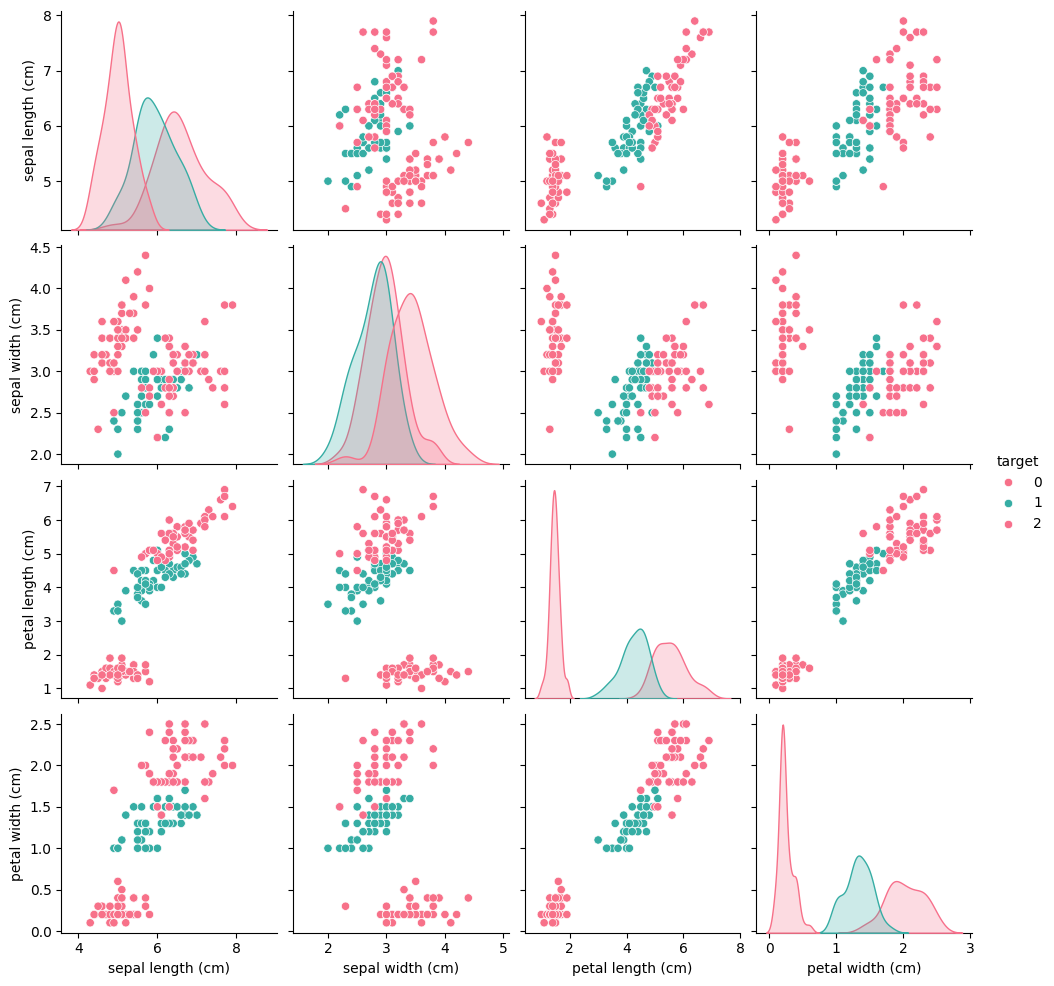

In [4]:
sns.pairplot(df, hue='target', palette='husl')
plt.show()

## Step 3: Split Dataset
We divide data into **training (80%)** and **testing (20%)** sets.

In [5]:
X = df.iloc[:, :-1]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Training set size: {X_train.shape}, Test set size: {X_test.shape}')

Training set size: (120, 4), Test set size: (30, 4)


## Step 4: Train a Basic Decision Tree

In [6]:
# Train a basic Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred = dt.predict(X_test)

# Evaluate
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Step 5: Visualize the Tree

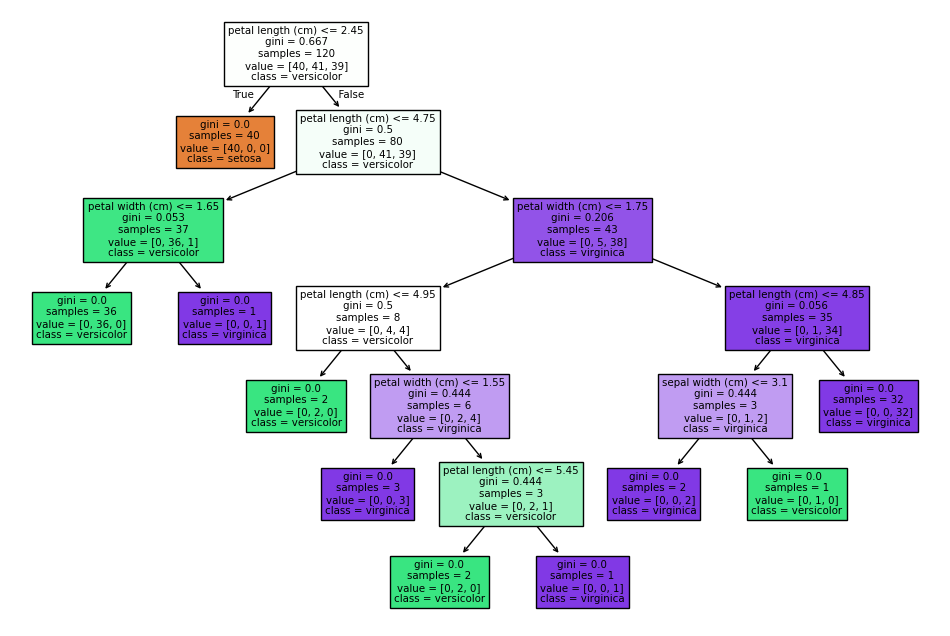

In [7]:
plt.figure(figsize=(12,8))
plot_tree(dt, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

## Step 6: DecisionTreeClassifier Parameters Explained

**Common Parameters:**
- `criterion`: Function to measure quality of a split ('gini' or 'entropy').
- `max_depth`: Maximum depth of tree. Prevents overfitting.
- `min_samples_split`: Minimum samples required to split an internal node.
- `min_samples_leaf`: Minimum samples required at a leaf node.
- `max_features`: Number of features to consider when looking for the best split.
- `ccp_alpha`: Complexity parameter used for Minimal Cost-Complexity Pruning.

Full documentation: [Scikit-learn DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

## Step 7: Cross-Validation
Cross-validation is used to evaluate model performance more reliably by splitting the data into *k* folds.
Each fold is used once for validation and *k-1* times for training.

In [8]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(dt, X, y, cv=5)
print('Cross-validation scores:', cv_scores)
print('Mean CV accuracy:', np.mean(cv_scores))

Cross-validation scores: [0.96666667 0.96666667 0.9        0.93333333 1.        ]
Mean CV accuracy: 0.9533333333333334


## Step 8: Pruning and Hyperparameter Tuning with GridSearchCV

## Step 9: Evaluate Tuned Model

Tuned Model Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



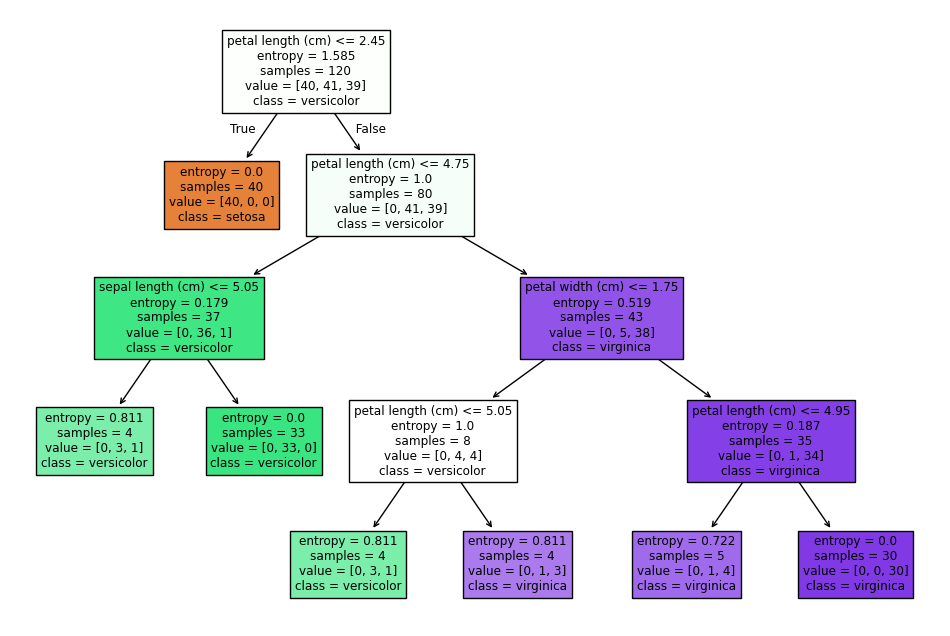

In [10]:
best_dt = grid_search.best_estimator_
y_pred_best = best_dt.predict(X_test)
print('Tuned Model Accuracy:', accuracy_score(y_test, y_pred_best))
print('\nClassification Report:\n', classification_report(y_test, y_pred_best))

plt.figure(figsize=(12,8))
plot_tree(best_dt, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

## Step 10: Cost Complexity Pruning (ccp_alpha)

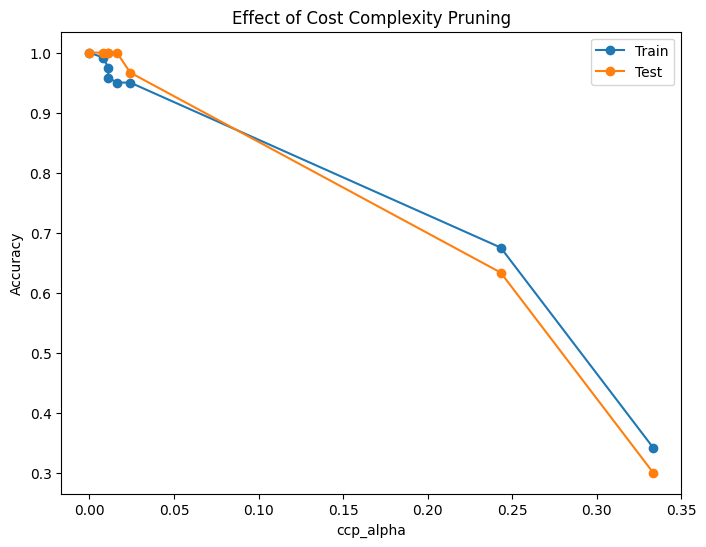

In [11]:
path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

plt.figure(figsize=(8,6))
plt.plot(ccp_alphas, train_scores, marker='o', label='Train')
plt.plot(ccp_alphas, test_scores, marker='o', label='Test')
plt.xlabel('ccp_alpha')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Effect of Cost Complexity Pruning')
plt.show()

## ✅ Summary
- Decision Trees can easily overfit; pruning controls complexity.
- Cross-validation helps assess model generalization.
- GridSearchCV automates parameter tuning.
- The `ccp_alpha` parameter can be used to prune trees post-training.